# Simple Linear Regression Project

Modelling the linear relationship regarding covid-19 vaccination.


# Project overview
In this project, I build a Simple Linear Regression model to study the linear relationship regarding covid-19 dataset.

# Simple Linear Regression
The goal of this notebook is to study the topic of simple linear regression on real-world data and to solve the problem using data science methodology.My name is Sina, I'm new to the data science and this is my first notebook!

# Problem Understanding
The COVID-19 outbreak has brought the whole planet to its knees.More over 4.5 million people have died since the writing of this notebook, 
and the only acceptable way out of the disaster is to vaccinate all parts of society. Despite the fact that the benefits of vaccination have been proved to the world many times, *anti-vaccine groups* are springing up all over the world.

In this notebook, we want to see **if the mortality rate is connected to the percentage of people that has been vaccinated ?**

# Analytic approach
The number of deaths is a continuous variable. We can use the **simple linear regression** method so that the number of deaths  is our dependent variable and the vaccination percentage is our independent variable.

# Data requirements and Data Collection
We need a table of vaccination statistics from all over the world to answer this question.
We also need to know the population of each and every country in the world, as well as the number of deaths from COVID-19. 

*First of all, we import the libraries required in this project: *

In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

### Datasets:
   1. We obtain new deaths each day from the World Health Organization database.This database is available at this address  https://covid19.who.int/info/  .We downloaded this database and read it in the ```who_source``` variable via *pandas*. 

In [2]:
who_source = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
who_source = who_source.rename(columns={"Country":"country", "Date_reported":"date" })
who_source.head(2)

,date,Country_code,country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0


   2. Through this information on the Kaggle website, we can also collect the vaccination progress of nations:
   https://www.kaggle.com/gpreda/covid-world-vaccination-progress
   And we store its value in the ```vaccine_source``` variable 

In [3]:
vaccine_source = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
vaccine_source.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


   3. Then we receive the population data of each country from the *Kaggle* website https://www.kaggle.com/rsrishav/world-population   and store it in the ```population_source``` variable . We also modify the *date* and *population* column name at the beginning .

In [4]:
population_source = pd.read_csv("../input/world-population/2021_population.csv")
population_source = population_source.rename(columns={'2021_last_updated': 'population'})
population_source.head(2)

,iso_code,country,population,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,445,505,364","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,396,984,434","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2


# Data Understanding and Preparation
After collecting our datasets, we have to merge the datasets based on the names of the countries. Before doing this, we check the difference between the names of the countries between the two datasets, ```who_source``` and ```population_source```. 

In [5]:
set(who_source.country) - set(population_source.country)

{'Antigua and Barbuda',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Congo',
 'Curaçao',
 'Czechia',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'French Guiana',
 'Guadeloupe',
 'Guernsey',
 'Guinea-Bissau',
 'Holy See',
 'Iran (Islamic Republic of)',
 'Isle of Man',
 'Jersey',
 'Kosovo[1]',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Northern Mariana Islands (Commonwealth of the)',
 'Other',
 'Pitcairn Islands',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Réunion',
 'Saba',
 'Saint Barthélemy',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Sint Eustatius',
 'Syrian Arab Republic',
 'The United Kingdom',
 'Timor-Leste',
 'Trinidad and Tobago',
 

So, by running the previous code, we identified which countries exist in the ```population_source``` data set but whose names do not exist or are slightly different in the ```population_source``` data set.
To overcome this limitation, we will change the names of several of these countries. We also apply these changes to ```vaccine_source``` Datasets. 

In [6]:
toedit = {"Antigua And Barbuda": 'Antigua and Barbuda',
 "Bolivia": 'Bolivia (Plurinational State of)',
 "Bosnia And Herzegovina": 'Bosnia and Herzegovina',
 "Brunei": 'Brunei Darussalam',
 "Cape Verde": 'Cabo Verde',
 "Curacao": 'Curaçao',
 "North Korea": "Democratic People's Republic of Korea",
 "Republic Of The Congo": 'Democratic Republic of the Congo',
 "Falkland Islands": 'Falkland Islands (Malvinas)',
 "Guinea Bissau": 'Guinea-Bissau',
 "Iran": 'Iran (Islamic Republic of)',
 "Isle Of Man": 'Isle of Man',
 "Laos": "Lao People's Democratic Republic",
 "Micronesia": 'Micronesia (Federated States of)',
 "Northern Mariana Islands": 'Northern Mariana Islands (Commonwealth of the)',
 "South Korea": 'Republic of Korea',
 "Moldova": 'Republic of Moldova',
 "Russia": 'Russian Federation',
 "Reunion": 'Réunion',
 "Saint Kitts And Nevis": 'Saint Kitts and Nevis',
 "Saint Pierre And Miquelon": 'Saint Pierre and Miquelon',
 "Saint Vincent And The Grenadines": 'Saint Vincent and the Grenadines',
 "Sao Tome And Principe": 'Sao Tome and Principe',
 "Syria": 'Syrian Arab Republic',
 "United Kingdom": 'The United Kingdom',
 "Timor Leste": 'Timor-Leste',
 "Trinidad And Tobago": 'Trinidad and Tobago',
 "Turks And Caicos Islands": 'Turks and Caicos Islands',
 "Tanzania": 'United Republic of Tanzania',
 "United States": 'United States of America',
 "Venezuela": 'Venezuela (Bolivarian Republic of)',
 "Vietnam": 'Viet Nam',
 "Wallis And Futuna": 'Wallis and Futuna',
 "Palestine": 'occupied Palestinian territory, including east Jerusalem'}
population_source["country"] = population_source["country"].replace(toedit)
vaccine_source["country"] = vaccine_source["country"].replace(toedit)

Then we select the columns we want from each data set and merge the data sets to create the final data frame named ```df``` 

In [7]:
who = who_source[["date", "country","New_deaths"]]
population = population_source[["iso_code","country", "population"]]
vaccine = vaccine_source[["country","iso_code","date","total_vaccinations","people_vaccinated","people_fully_vaccinated"]]
# We drop rows with NaN value at this stage from  vaccine data frame
vaccine = vaccine.dropna().reset_index(drop=True) 

We merge ```who``` and ```population``` datasets to create ```who_population_merge``` data frame 


In [8]:
who_population_merge = pd.merge(who, population)
who_population_merge.head(2)

,date,country,New_deaths,iso_code,population
0,2020-01-03,Afghanistan,0,AFG,"40,079,431"
1,2020-01-04,Afghanistan,0,AFG,"40,079,431"


We also merge ```vaccine``` and ```who_population_merge``` datasets to create ```df``` the final data frame 


In [9]:
df = pd.merge(vaccine,who_population_merge).reset_index(drop=True)
df.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,"40,079,431"
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,"40,079,431"


Now we can see the names of the countries and columns in our final data frame 

In [10]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'G

Before we start working with our data, we need to delete the ```commas``` and convert the data to the ```flaot``` 

In [11]:
def f_1(row):
    row.population = row.population.replace(',','')
    return row
df=df.apply(f_1, axis=1)
df.population = df.population.astype("float64")
df.people_vaccinated = df.people_vaccinated.astype("float64")

Since the percentage of vaccinations in countries is not available in our data frame, we calculate this percentage by dividing the ```people_vaccinated``` by the ```population``` of that country, and we store the data in the new column named ```ratio``` .

In [12]:
df = df.assign(ratio=[0]*len(df))
def f_2(row):
    row.ratio = row.people_vaccinated / row.population * 100 
    return row
df=df.apply(f_2, axis=1)

Now let's take a look at our data to get more acquainted with it.
Here we plot the percentage of vaccinations and recent deaths of the COVID-19.
for example ,let's look at the situation in **Italy**. Italy, as you may know, was one of the first countries to be hit by the disease: 

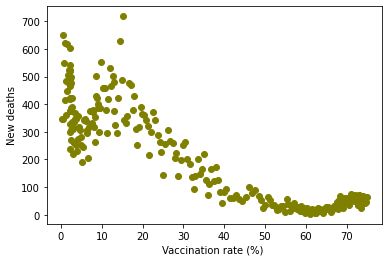

In [13]:
mydf= df
mydf = mydf[mydf.country == "Italy"]
plt.scatter( mydf.ratio , mydf.New_deaths, color='olive')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

interesting! The chart above shows that the higher the vaccination rate in Italy, the lower the mortality rate. 
# Modeling
It's time to see if we can create a model with our data.
We previously stated that we intend to use simple linear regression.
Consider the model function

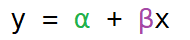

which describes a line with slope β and y-intercept α .
Here we call β **Coefficients** and we call α **Intercept**. 

Using sklearn package to model data and finding Coefficients and Intercept.

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-5.91437467]]
Intercept:  [416.5210202]


Now that we've found **Coefficients** and **Intercept**, we can draw a regression line on the chart. 

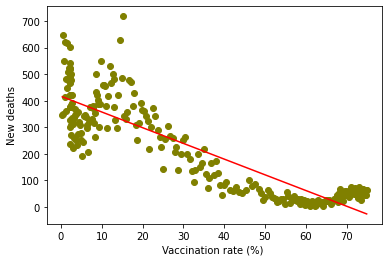

In [15]:
plt.scatter(mydf.ratio, mydf.New_deaths,  color='olive')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

# Evaluation
To measure the accuracy of a regression model, we compare the actual and projected values.
Evaluation metrics play an important part in the development of a model since they give insight into areas that need to be improved. 
There are several model assessment metrics; in this case, we'll use MSE to determine the accuracy of our model based on the test set: 

```Wikipedia:```In statistics, **mean absolute error (MAE)** is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. **MAE** is calculated as: 
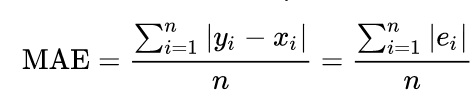

```Wikipedia:```In statistics, the **mean squared error (MSE)** or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate:
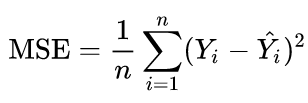


**Root Mean Squared Error (RMSE)**:is the standard deviation of the residuals (prediction errors):

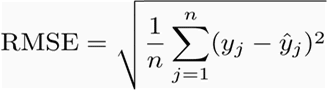

```Investopedia: ```**R-squared** is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R^2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs. 

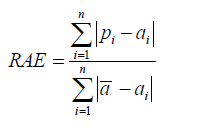





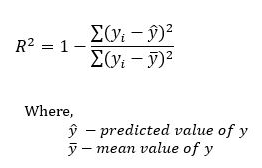

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 67.08
Residual sum of squares (MSE): 7019.12
R2-score: 0.78


 the **R²** value of our model is **0.78**. This statement means that our model explains 78% of the variance of the data corresponding to the number of articles. It is close to 1 so we can say this is a **good model**.

---

### Now let's apply simple linear regression to **Portugal**  data and see the result. 

Coefficients:  [[-1.12947243]]
Intercept:  [78.49344045]


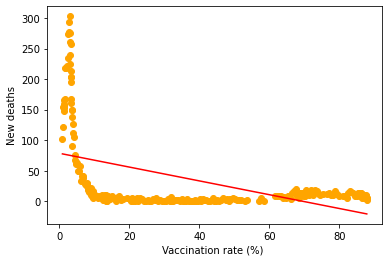

Mean absolute error: 44.70
Residual sum of squares (MSE): 3568.63
R2-score: 0.24


In [17]:
mydf = df[df.country == "Portugal"]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


plt.scatter(mydf.ratio, mydf.New_deaths,  color='orange')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

As you can see, **R2-score: 0.24** and this Simple Linear Regression is not a good model.R square can have a negative value when the model selected does not follow the trend of the data, therefore leading to a worse fit than the horizontal line. Although the negative slope still shows the good effect of vaccination in reducing mortality, but our model is not a good enough.  
This may be a good reason to go back from the evaluation stage to the modeling stage and build a new model to be more consistent with our data. as you know the final stages of the data science methodology are an iterative cycle between Modelling, Evaluation, Deployment, and Feedback.
So, perhaps it's preferable to return to the same dataset in the following notebook and try to build a better model during the modeling step. 
